C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


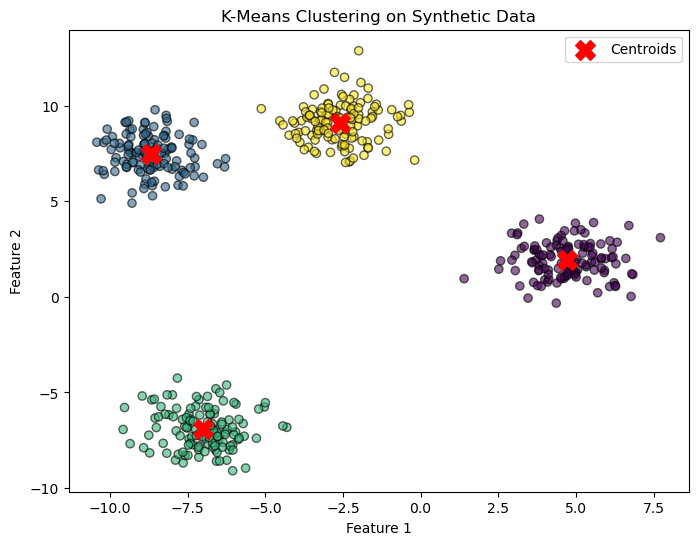

In [89]:
#21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
n_samples = 500  # Number of data points
n_features = 2   # Number of features (for 2D visualization)
n_clusters = 4   # Number of cluster centers

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [93]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data  # Using all four features

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X_iris)

# Display the first 10 predicted labels
y_agg[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

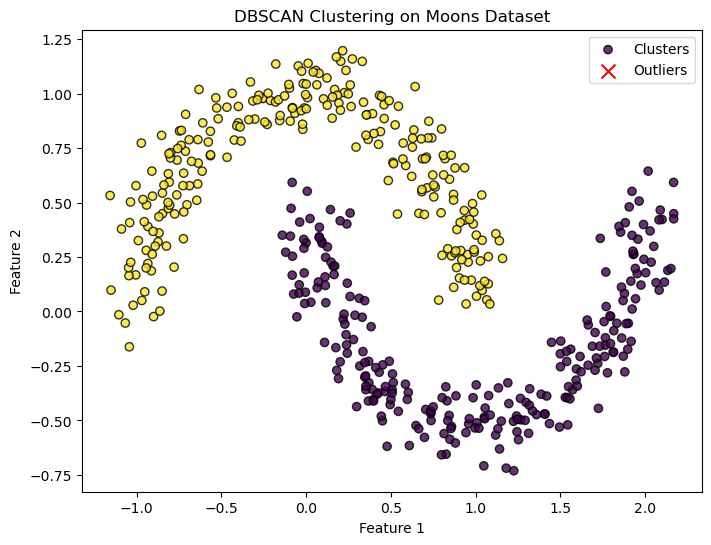

In [95]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with two interleaving half circles (moons)
X_moons, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Adjust parameters as needed
y_dbscan = dbscan.fit_predict(X_moons)

# Identify core points, border points, and outliers
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = y_dbscan == -1  # Outliers are labeled as -1

# Visualize DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[core_samples_mask, 0], X_moons[core_samples_mask, 1], 
            c=y_dbscan[core_samples_mask], cmap='viridis', edgecolors='k', alpha=0.8, label='Clusters')
plt.scatter(X_moons[outliers_mask, 0], X_moons[outliers_mask, 1], 
            c='red', marker='x', s=100, label='Outliers')

plt.title("DBSCAN Clustering on Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [97]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Create a DataFrame to analyze cluster sizes
cluster_sizes = pd.Series(labels).value_counts().sort_index()

# Print the size of each cluster
for cluster_num, size in cluster_sizes.items():
    print(f"Cluster {cluster_num}: {size} samples")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


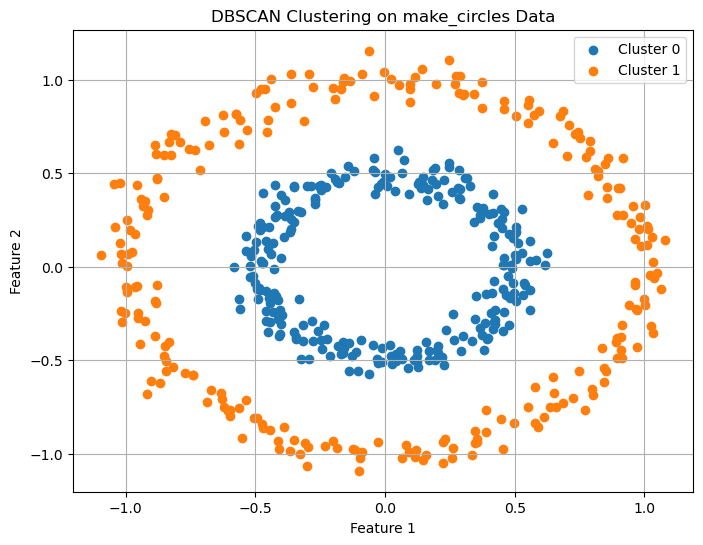

In [99]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)

for label in unique_labels:
    cluster_points = X[labels == label]
    if label == -1:
        # Noise points
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='gray', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=feature_names)

# Print cluster centroids
print("Cluster centroids (after MinMax Scaling):")
print(centroids_df)


Cluster centroids (after MinMax Scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst f

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


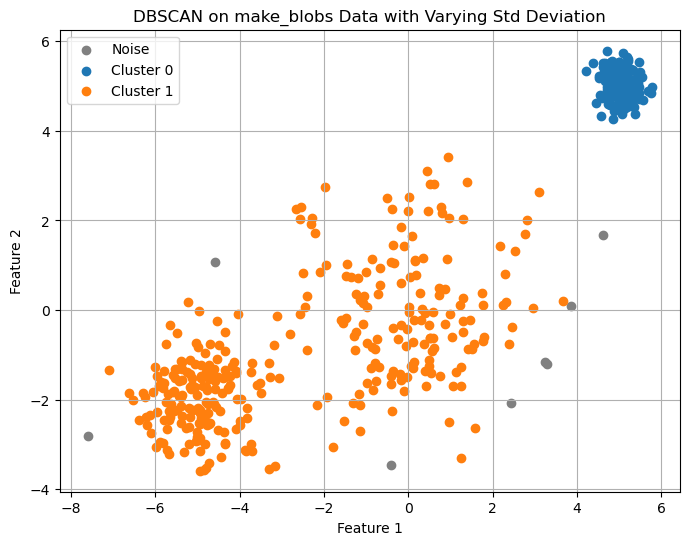

In [103]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic data with varying cluster std deviations
X, y = make_blobs(n_samples=500,
                  centers=[(-5, -2), (0, 0), (5, 5)],
                  cluster_std=[0.8, 1.5, 0.3],
                  random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)

for label in unique_labels:
    cluster_points = X[labels == label]
    if label == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='gray', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.title("DBSCAN on make_blobs Data with Varying Std Deviation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


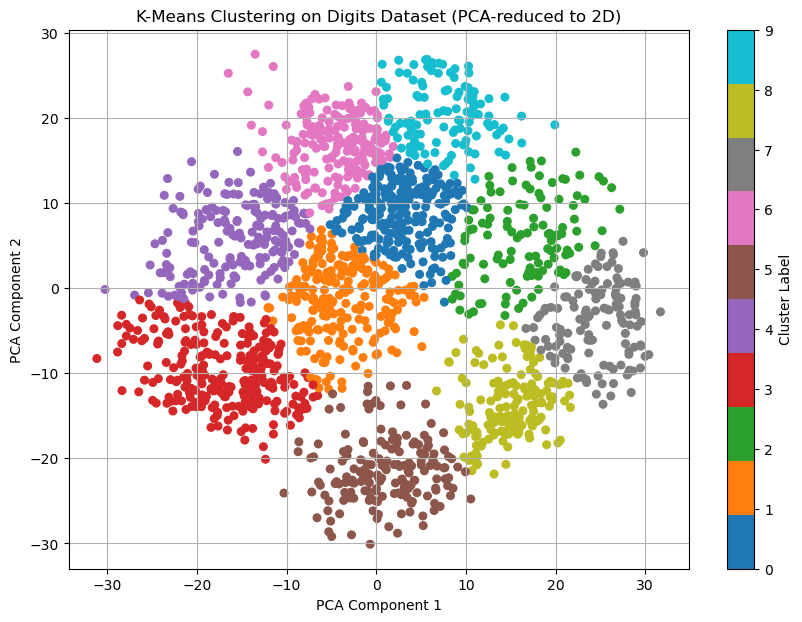

In [105]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Actual labels (not used in K-Means)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering (we know there are 10 digits: 0–9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title("K-Means Clustering on Digits Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

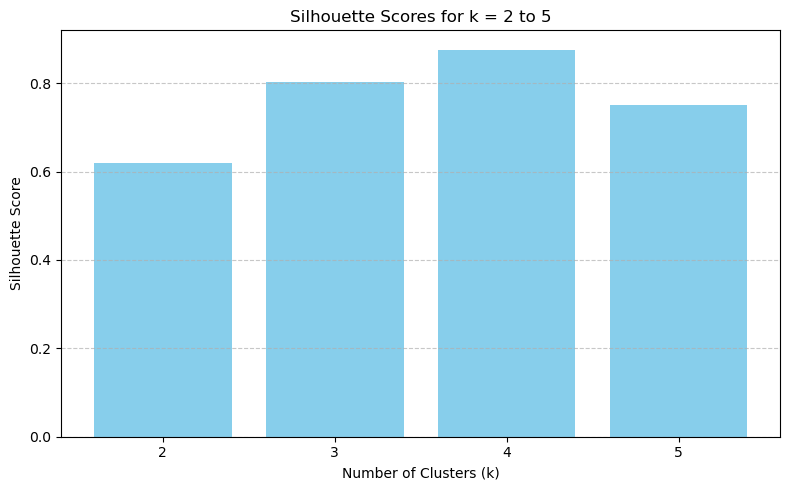

In [107]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


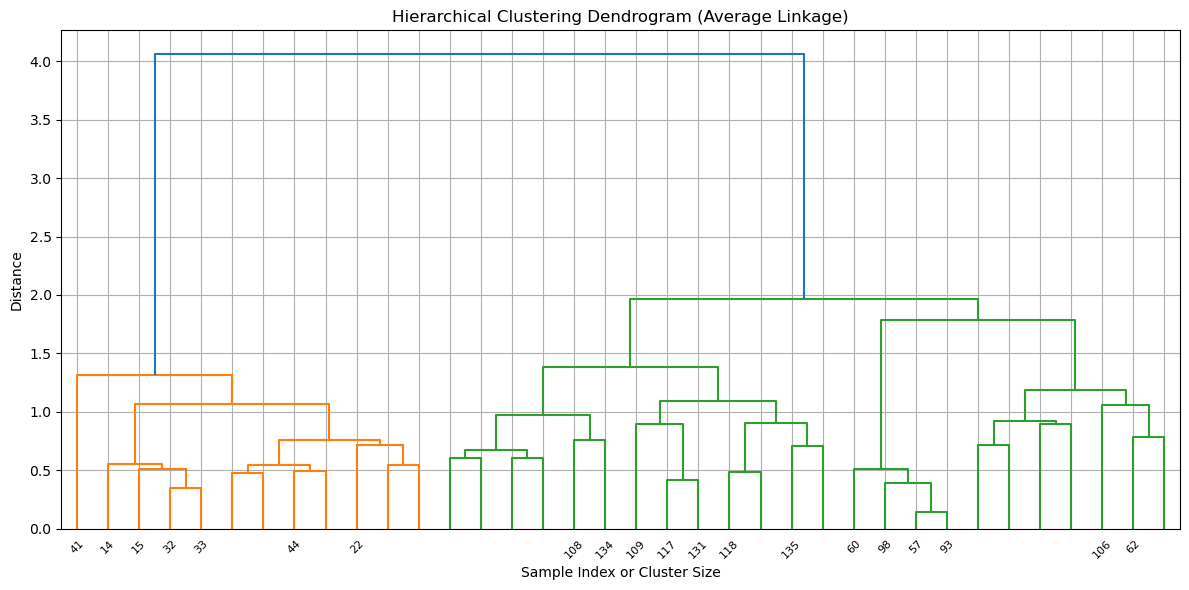

In [109]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering with average linkage
linked = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False,
           truncate_mode='level',  # To keep plot readable
           p=5)  # Show only last 5 merges for clarity
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


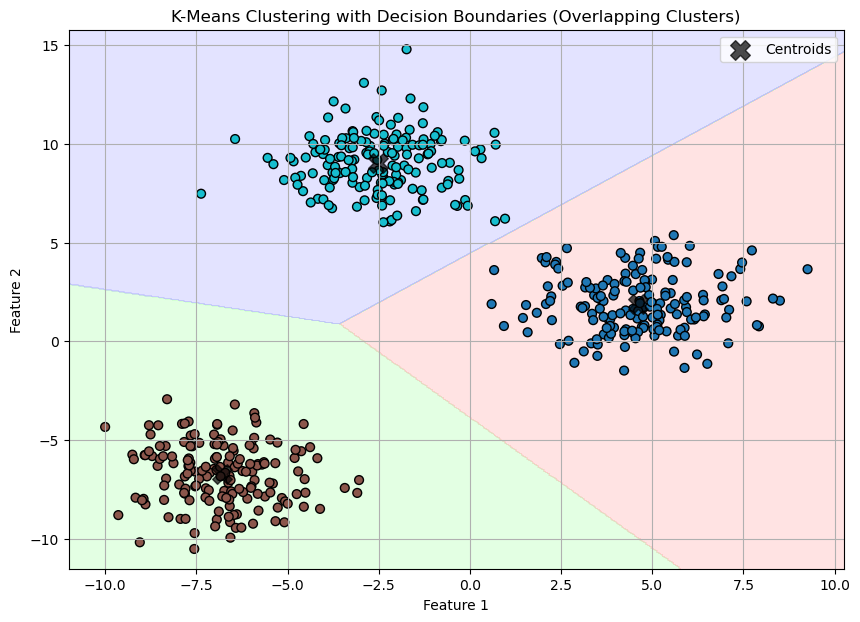

In [111]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Step 3: Create a mesh grid for decision boundary visualization
h = 0.05  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and cluster points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF']), alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', edgecolor='k', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries (Overlapping Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


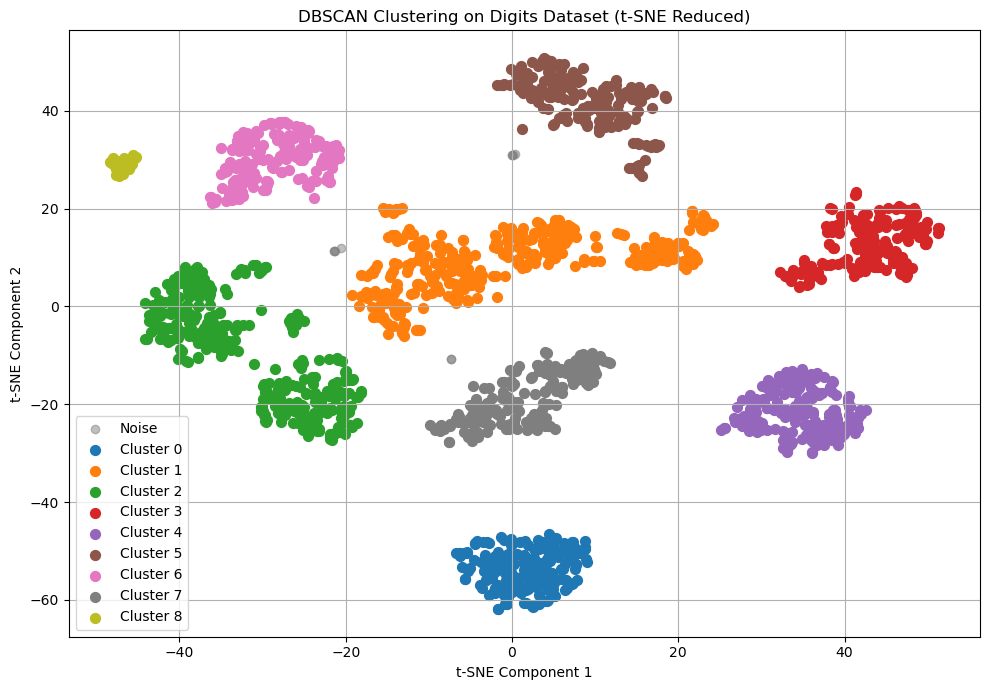

In [114]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # true labels (for reference only)

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize the results
plt.figure(figsize=(10, 7))
unique_labels = np.unique(labels)

for label in unique_labels:
    cluster = X_tsne[labels == label]
    if label == -1:
        # Noise points
        plt.scatter(cluster[:, 0], cluster[:, 1], color='gray', label='Noise', alpha=0.5)
    else:
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {label}', s=50)

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


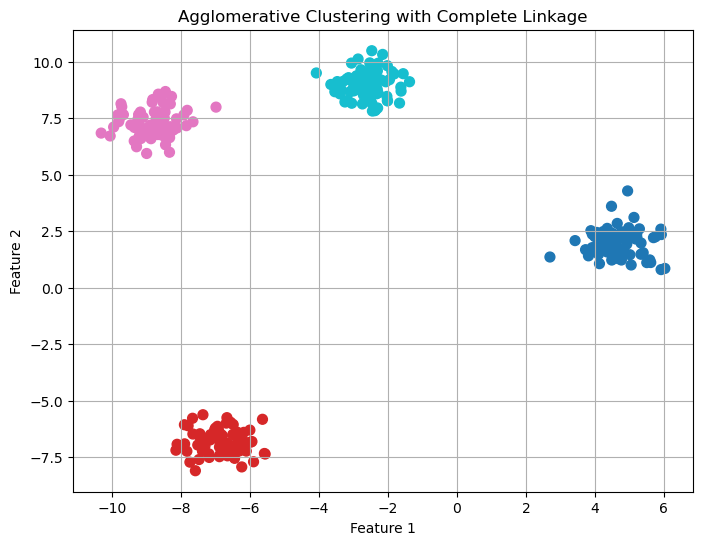

In [116]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result\
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

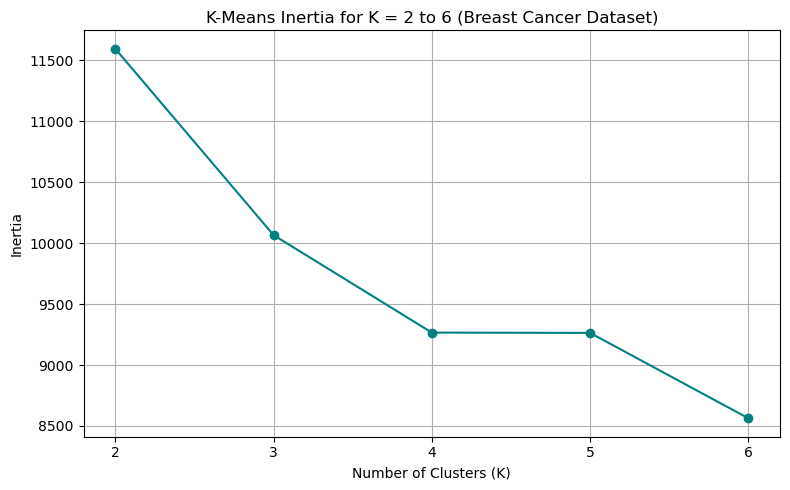

In [118]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute inertia for K = 2 to 6
inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='teal')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)')
plt.grid(True)
plt.tight_layout()
plt.show()


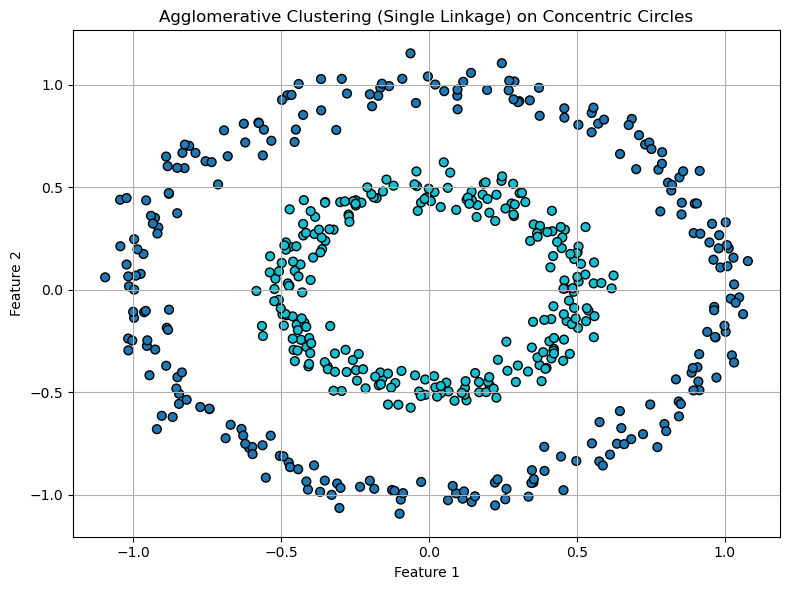

In [120]:
#Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circle data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clustering.fit_predict(X)

# Step 3: Plot the clustered results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [122]:
#Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


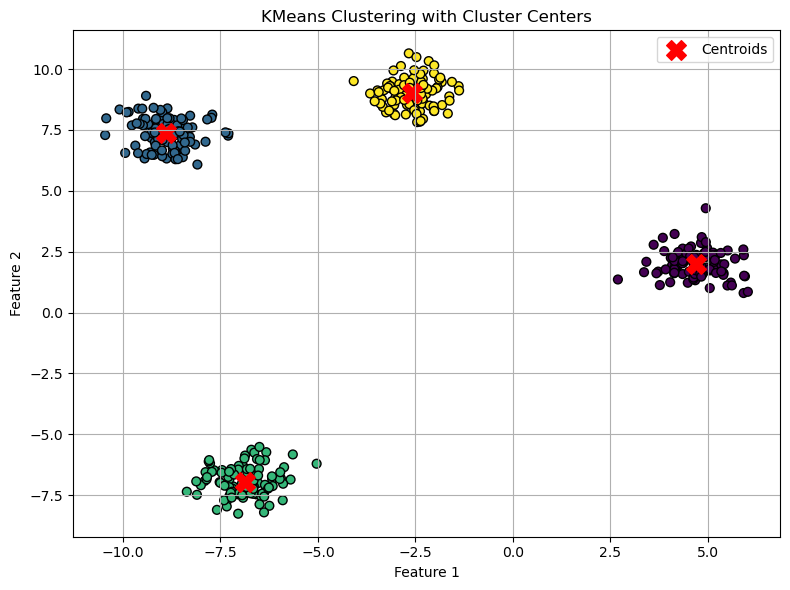

In [124]:
#Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
#Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count noise samples (label == -1)
n_noise = np.sum(labels == -1)

print(f"Number of noise samples: {n_noise}")


Number of noise samples: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


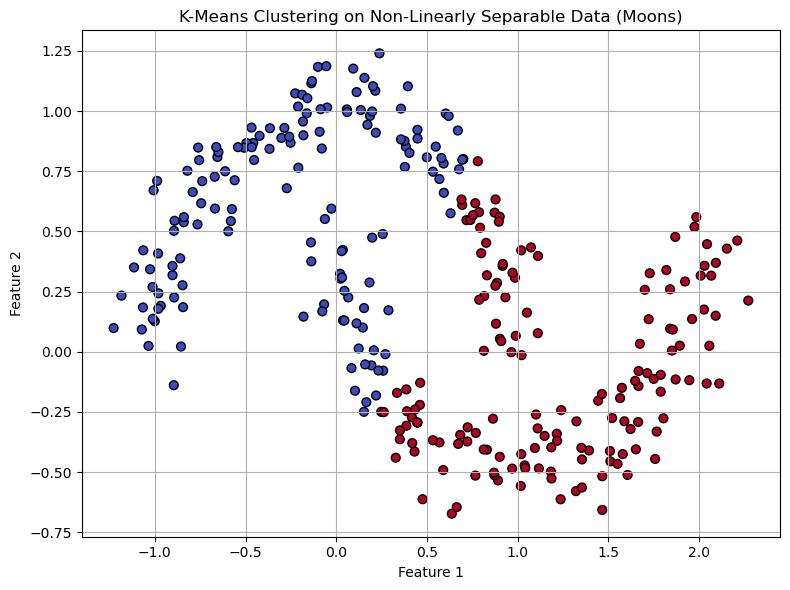

In [128]:
#Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate synthetic non-linear data
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=40, edgecolor='k')
plt.title('K-Means Clustering on Non-Linearly Separable Data (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


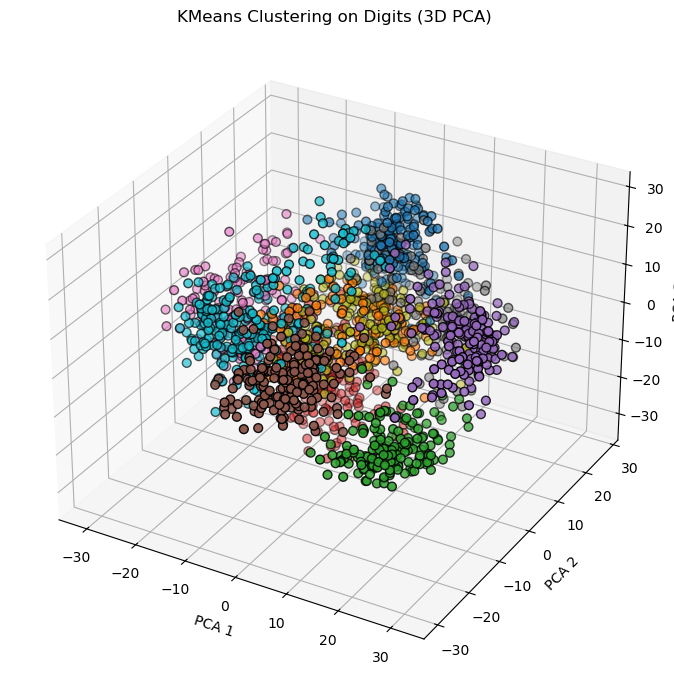

In [130]:
#Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401, needed for 3D plots

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # true labels (not used for clustering)

# Step 2: Reduce dimensions to 3 using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

# Step 4: Visualize with a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=40, edgecolor='k')

ax.set_title('KMeans Clustering on Digits (3D PCA)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.tight_layout()
plt.show()


In [132]:
#Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Evaluate with silhouette score
score = silhouette_score(X, labels)

print(f"Silhouette Score for KMeans with 5 clusters: {score:.4f}")


Silhouette Score for KMeans with 5 clusters: 0.7993


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


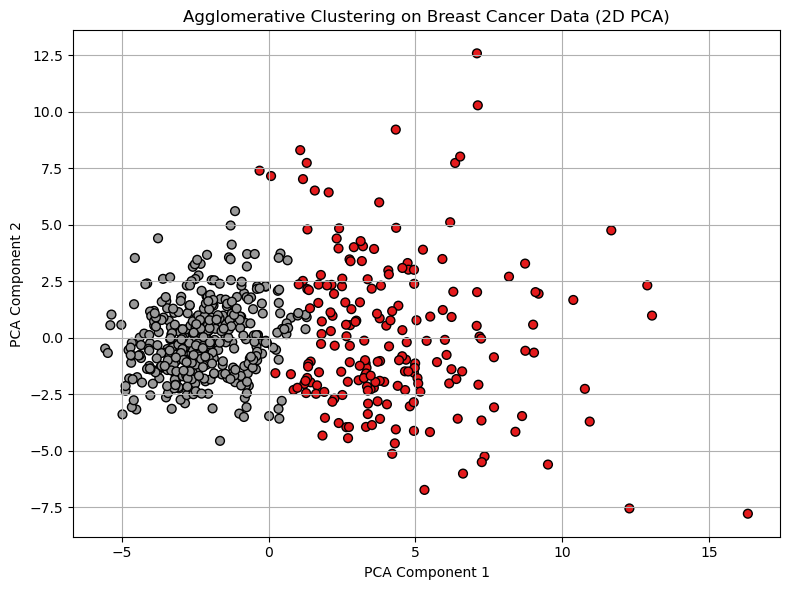

In [134]:
#Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg.fit_predict(X_pca)

# Step 5: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=40, edgecolor='k')
plt.title('Agglomerative Clustering on Breast Cancer Data (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


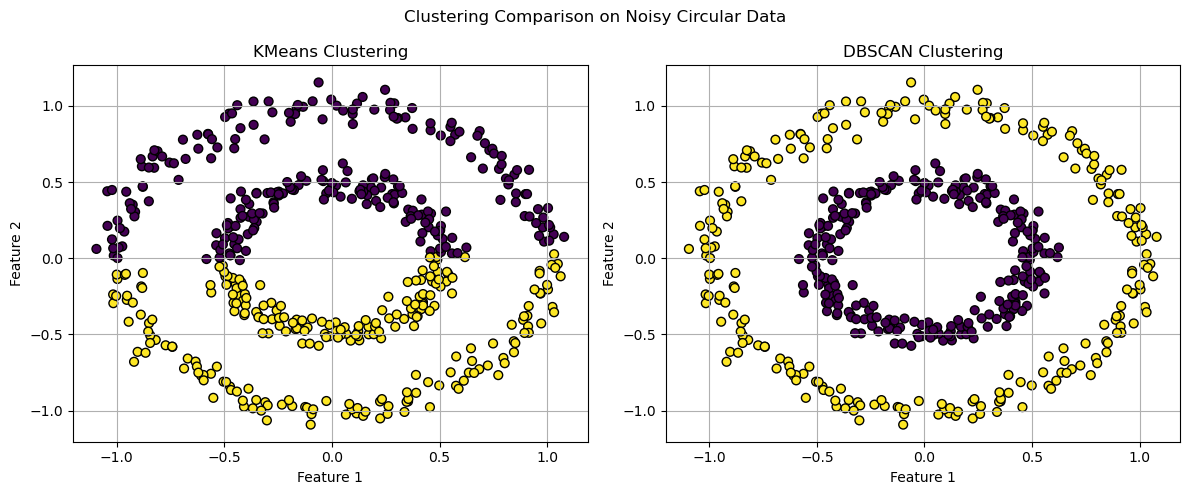

In [136]:
#Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Generate noisy circular data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Plot both clustering results side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# KMeans plot
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=40, edgecolor='k')
axs[0].set_title('KMeans Clustering')

# DBSCAN plot
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=40, edgecolor='k')
axs[1].set_title('DBSCAN Clustering')

for ax in axs:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True)

plt.suptitle('Clustering Comparison on Noisy Circular Data')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


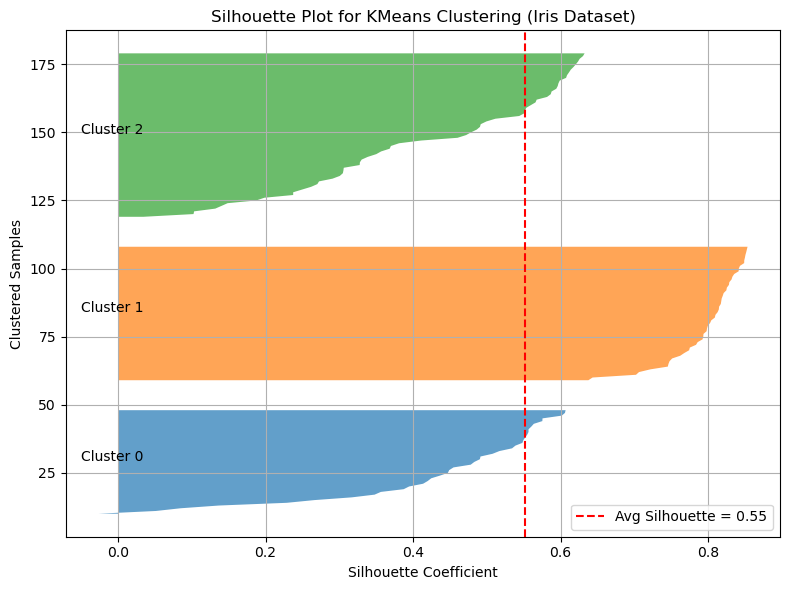

In [138]:
#Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette scores
sample_silhouette_values = silhouette_samples(X, labels)
avg_silhouette = silhouette_score(X, labels)

# Step 4: Plot the silhouette values for each sample
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):  # for each cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Avg Silhouette = {avg_silhouette:.2f}")
plt.title("Silhouette Plot for KMeans Clustering (Iris Dataset)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Clustered Samples")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


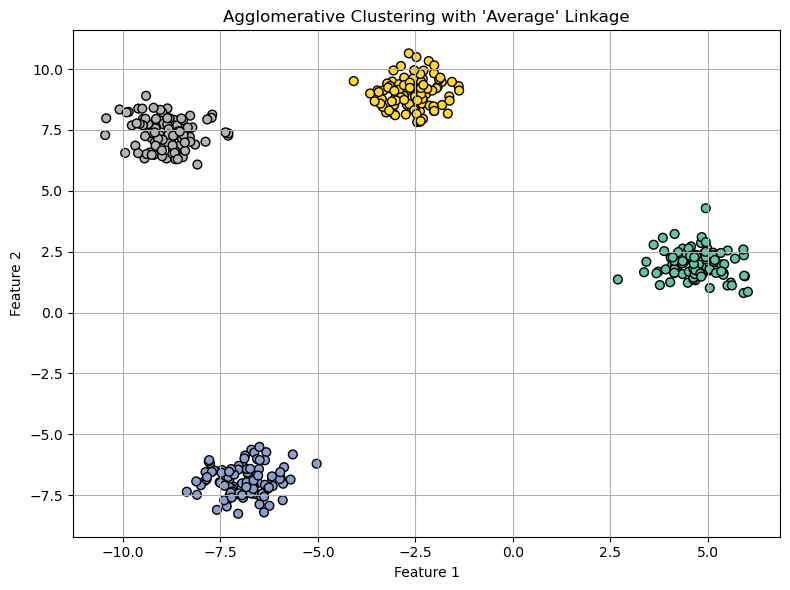

In [140]:
#Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=40, edgecolor='k')
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


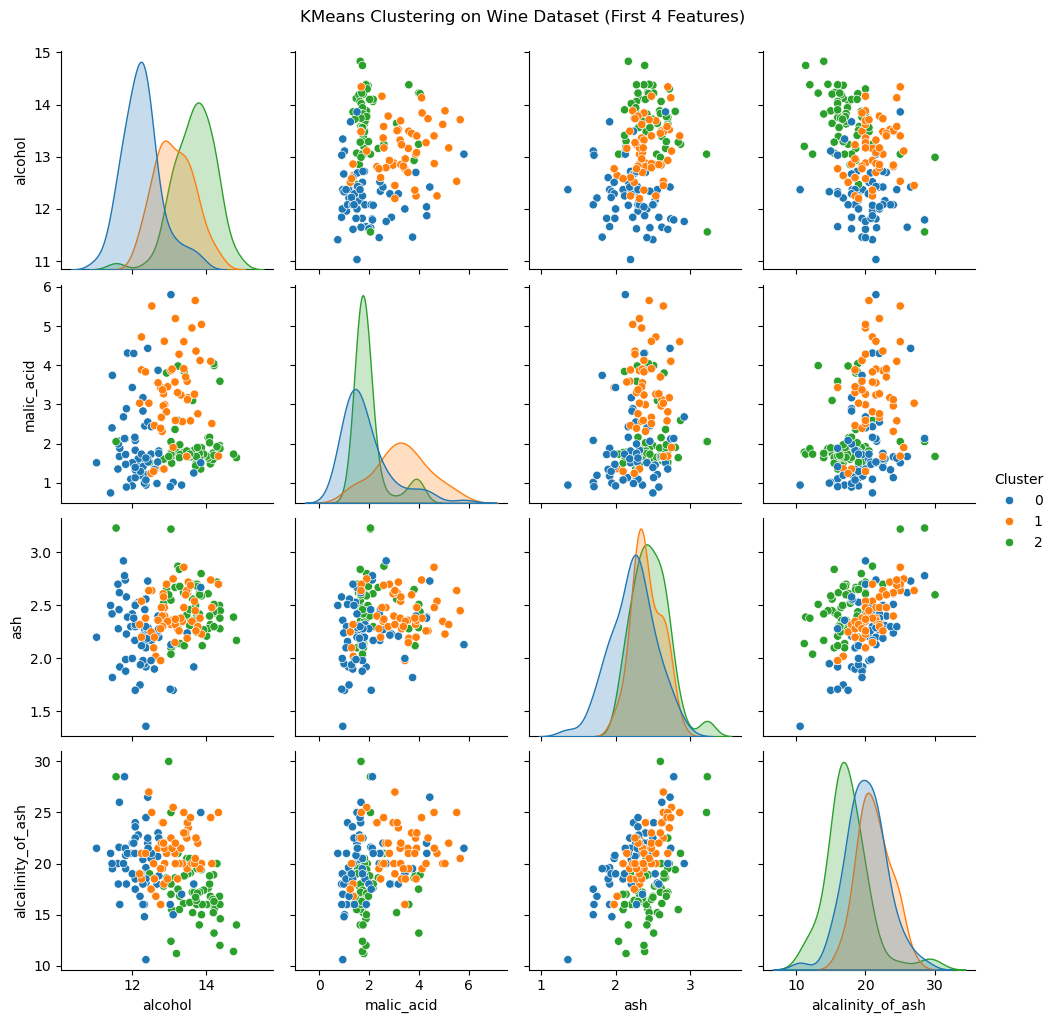

In [142]:
#Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Add cluster labels to DataFrame
df['Cluster'] = labels

# Step 5: Visualize with seaborn pairplot (first 4 features)
sns.pairplot(df.iloc[:, :4].join(df['Cluster']), hue='Cluster', palette='tab10')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [144]:
#Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate noisy blob data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Count clusters (excluding noise) and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 4
Number of noise points: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


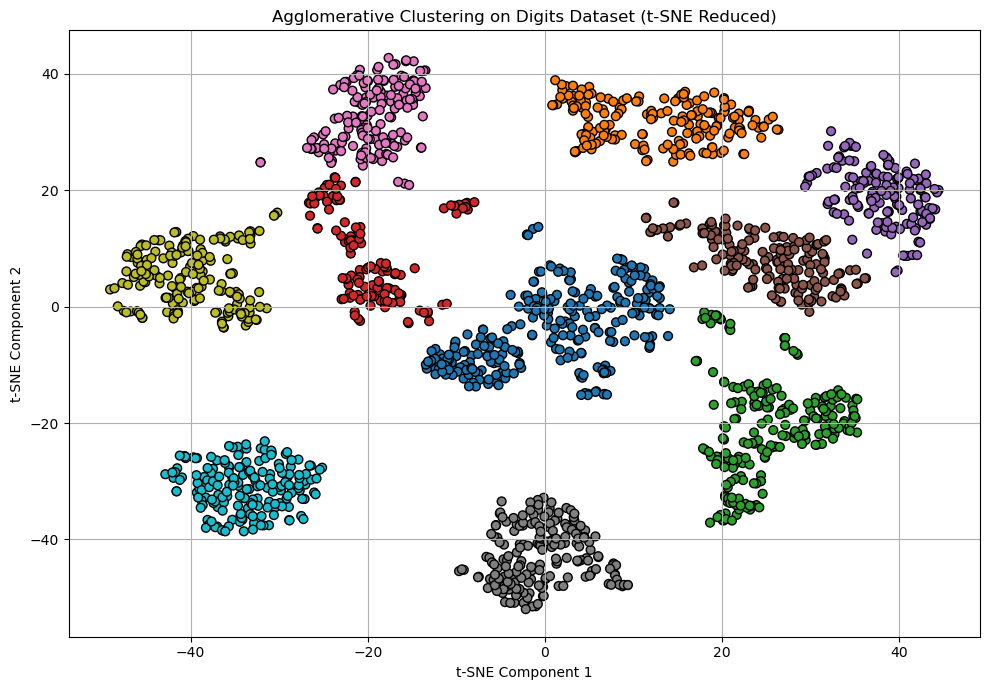

In [146]:
#Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Standardize the data (recommended before t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X_tsne)

# Step 5: Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
